## 데이터 사용전 데이터를 분석, 시각화 하여 확인해보자

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.keys())
print(housing.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

In [4]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df["Price"] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


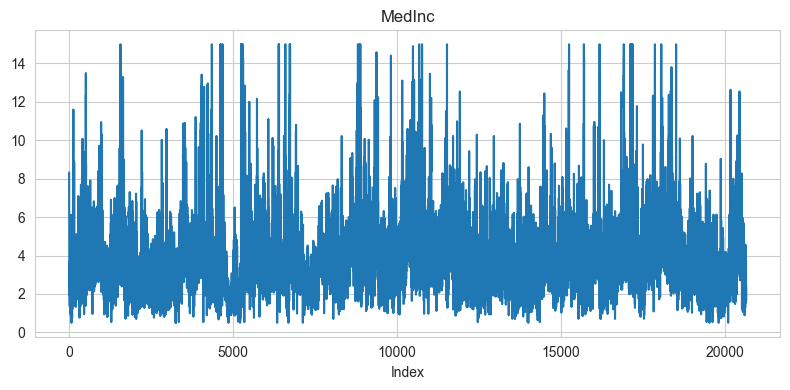

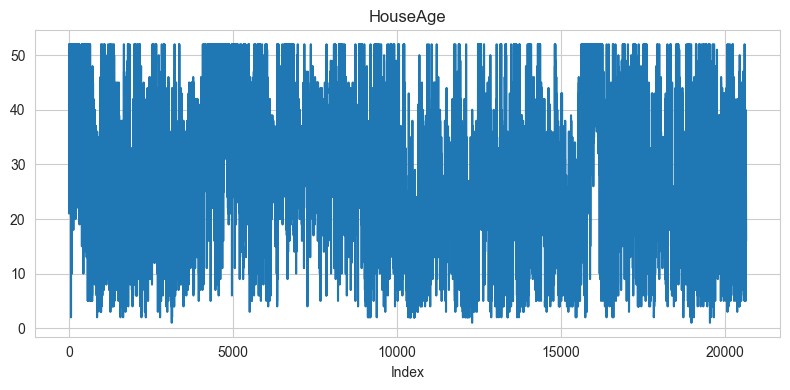

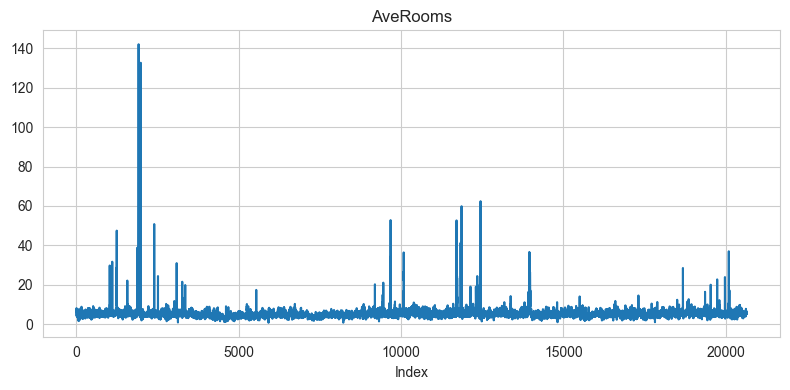

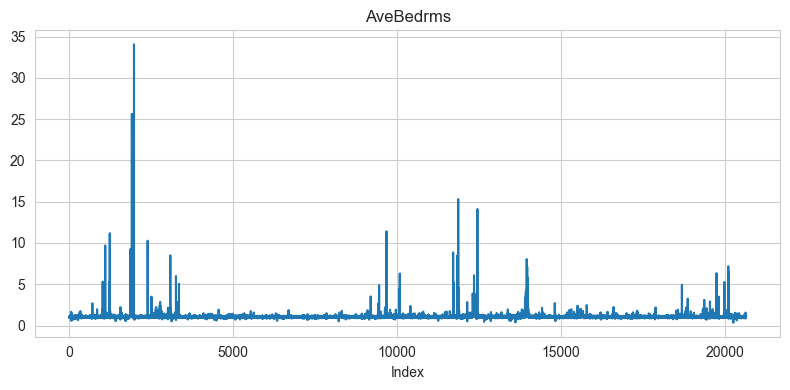

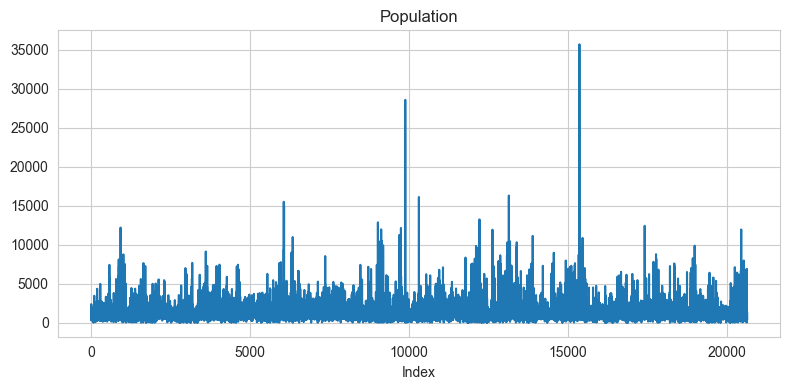

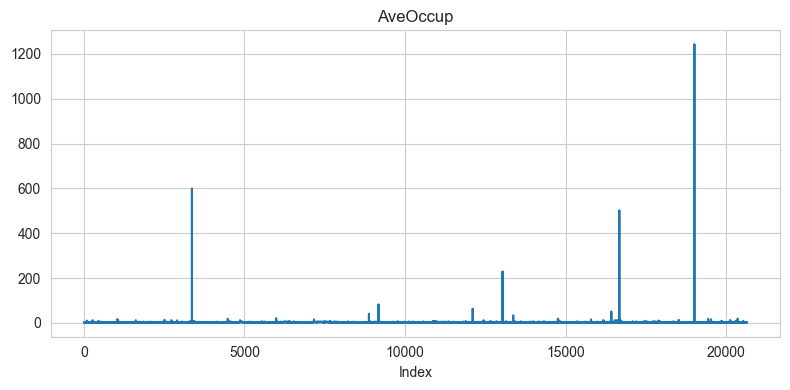

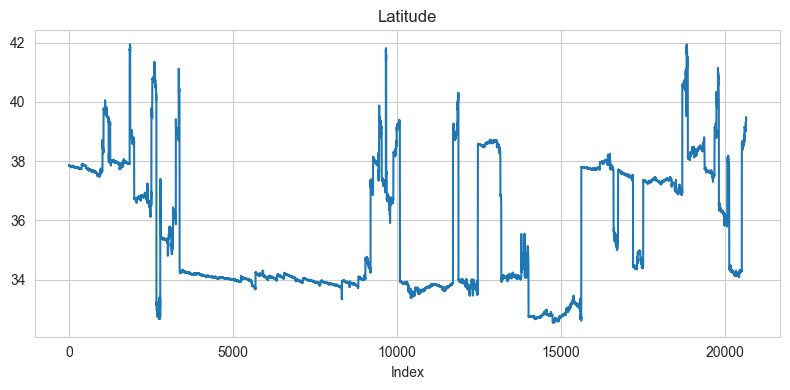

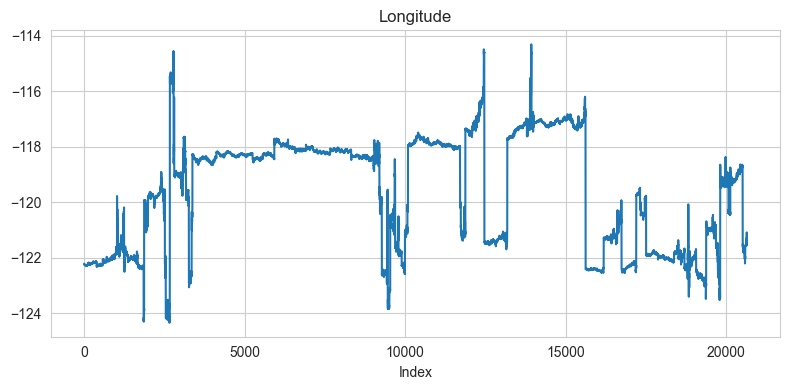

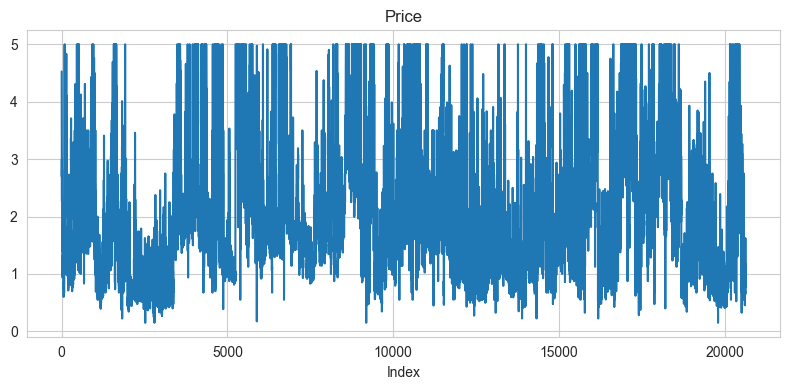

In [6]:
for i, col in enumerate(housing_df.columns):
    plt.figure(figsize=(8, 4))
    plt.plot(housing_df[col])
    plt.title(col)
    plt.xlabel("Index")
    plt.tight_layout()

In [23]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


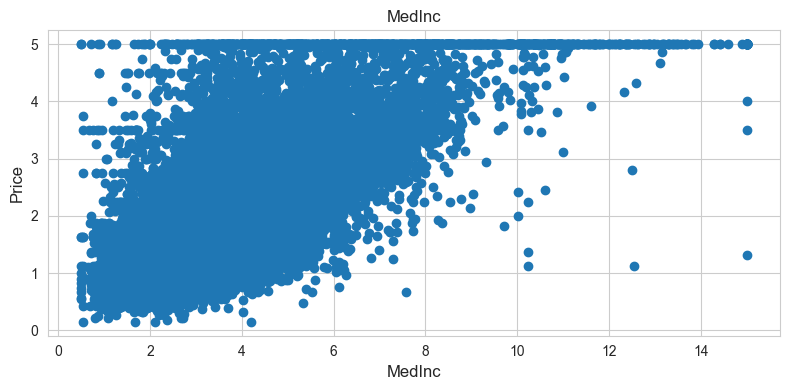

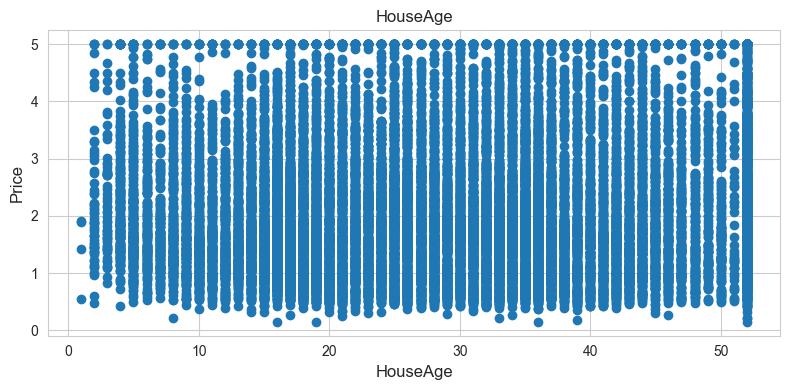

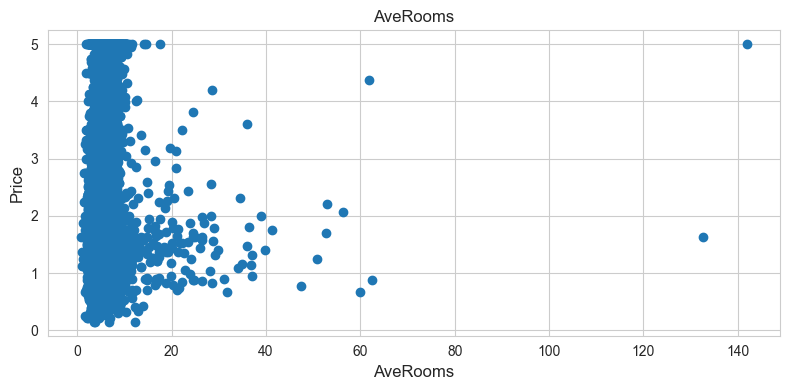

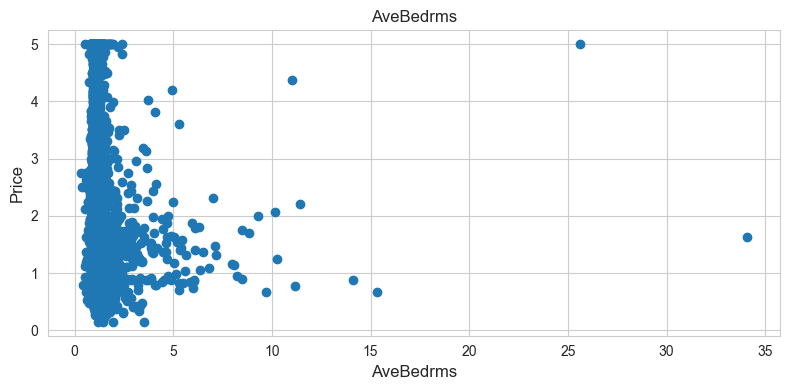

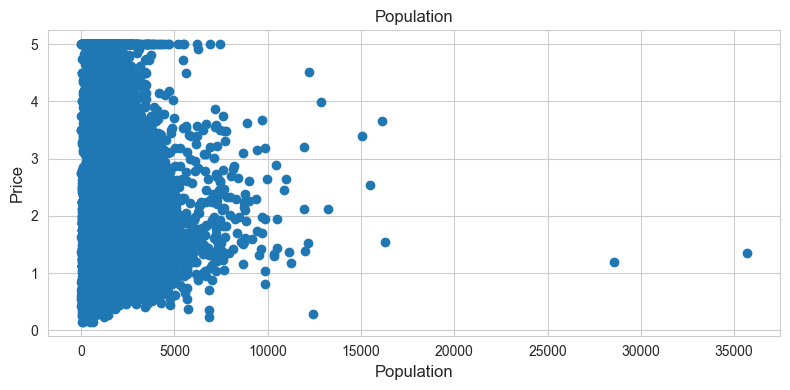

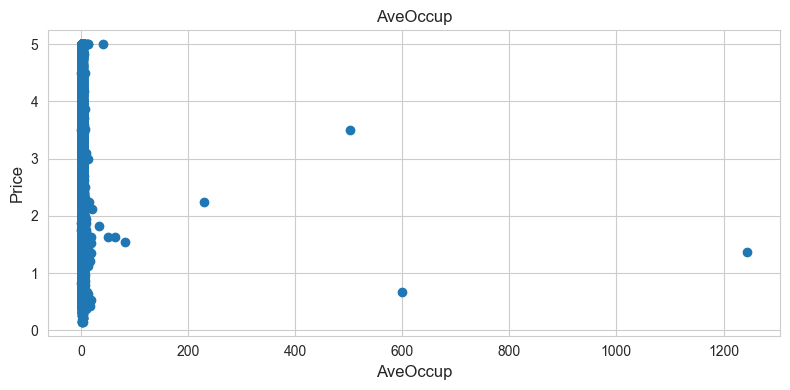

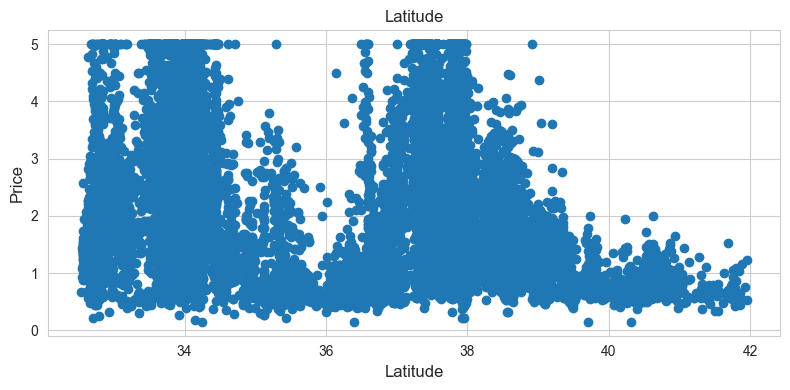

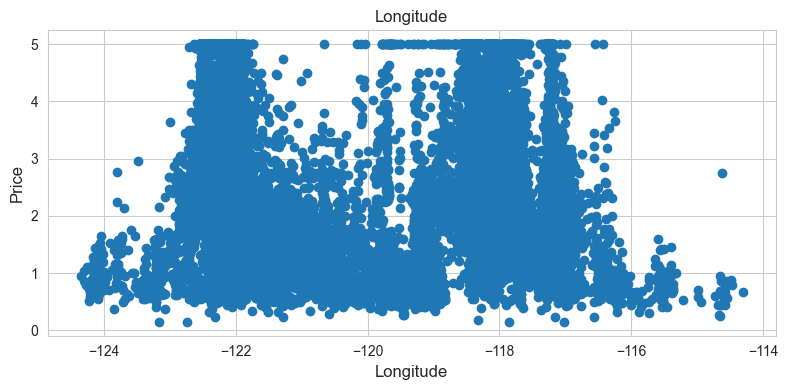

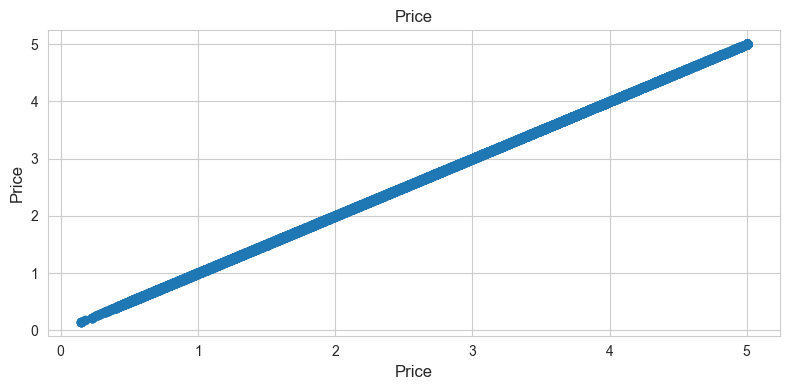

In [12]:
for i, col in enumerate(housing_df.columns):
    plt.figure(figsize=(8, 4))
    plt.scatter(housing_df[col], housing_df["Price"])
    plt.title(col)
    plt.ylabel("Price", size=12)
    plt.xlabel(col, size=12)
    plt.tight_layout()

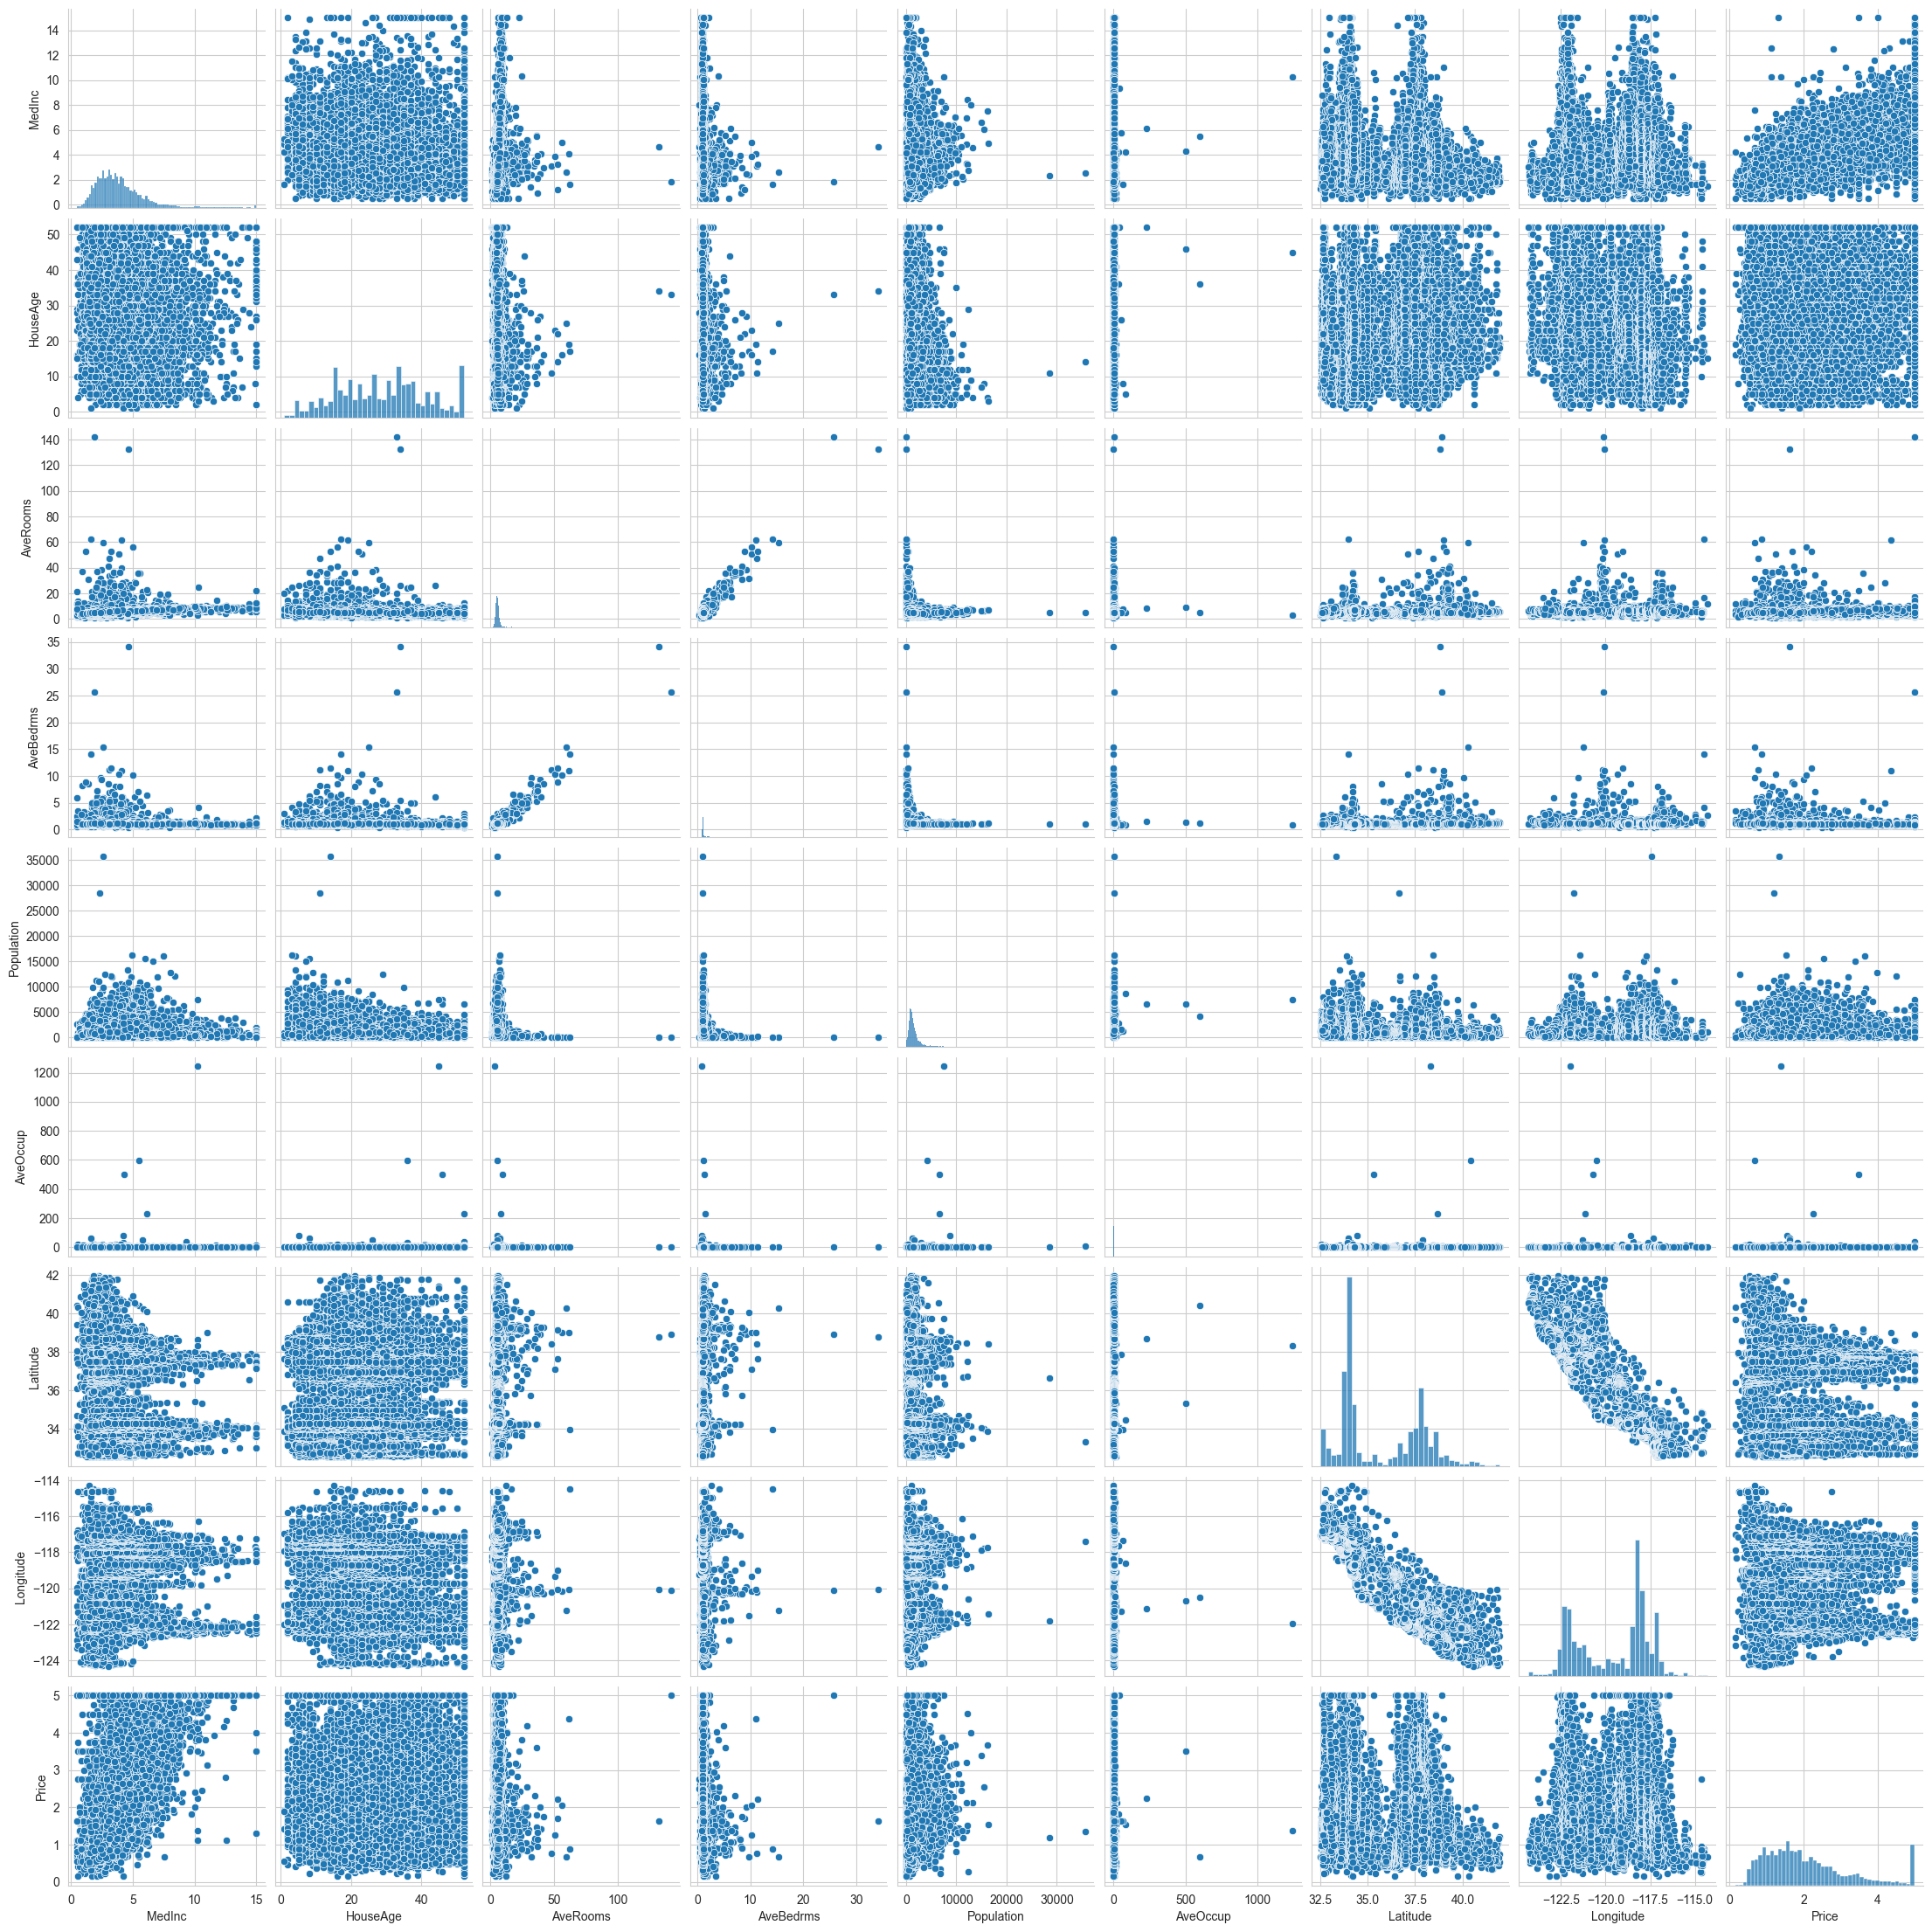

In [ ]:
import seaborn as sns

sns.pairplot(housing_df)

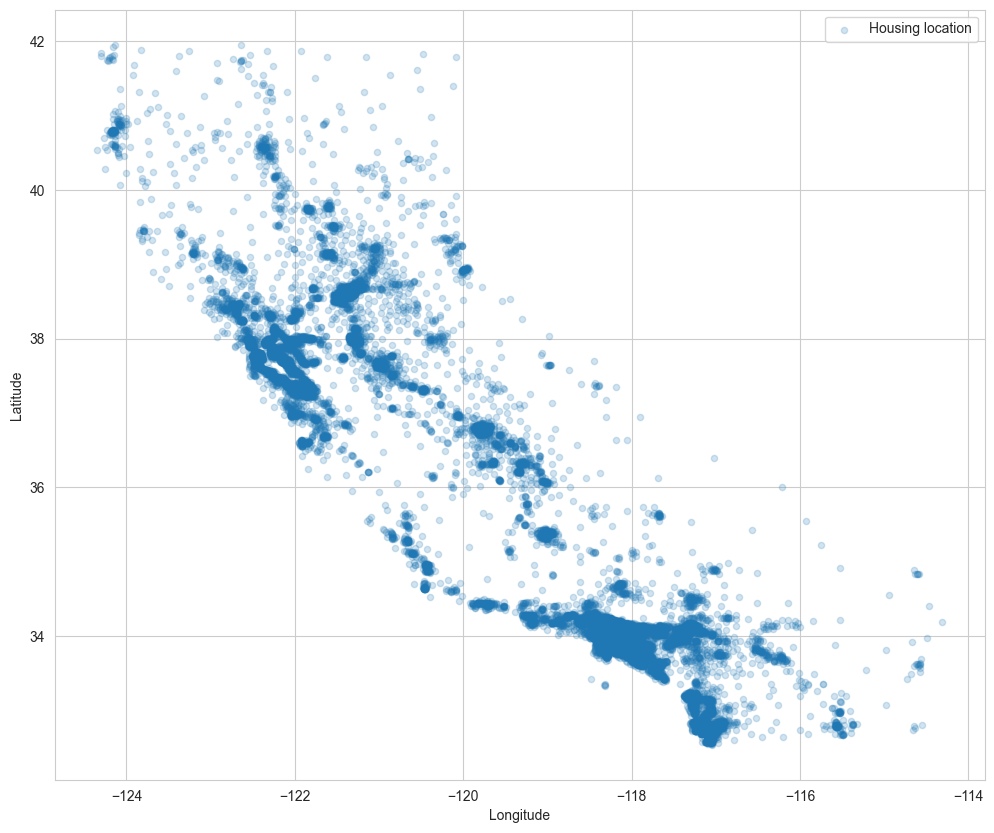

In [14]:
housing_df.plot(
    kind="scatter", x="Longitude", y="Latitude", alpha=0.2, figsize=(12, 10)
)
plt.legend(["Housing location"])

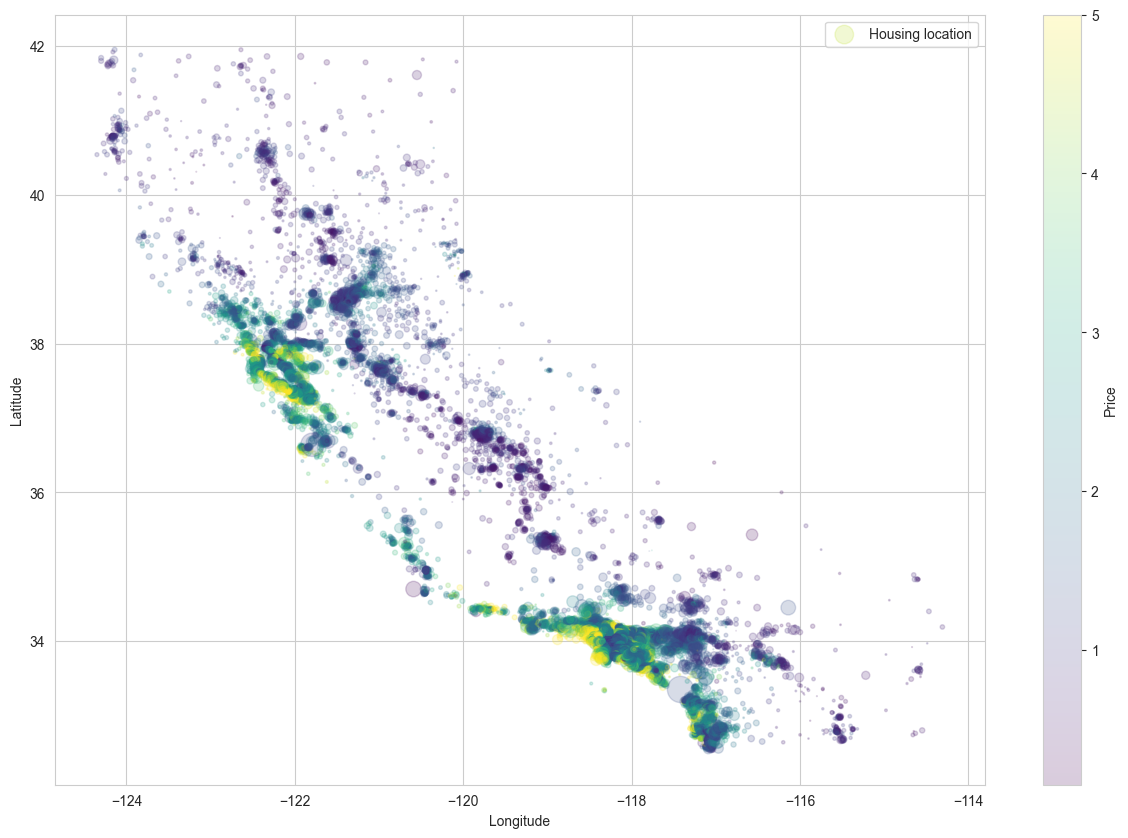

In [16]:
housing_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.2,
    s=housing_df["Population"] / 100,
    figsize=(15, 10),
    label="Population",
    c="Price",
    cmap=plt.get_cmap("viridis"),
    colorbar=True,
)
plt.legend(["Housing location"])

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.3
)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

print(f"Training Data evaluation : {model.score(X_train, y_train)}")
print(f"test Data evaluation : {model.score(X_test, y_test)}")
# score : 주어진 데이터에 대한 모델의 에측 정확성이나 설명력을 측정

Training Data evaluation : 0.6058378618619373
test Data evaluation : 0.6066045150916299


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, housing.data, housing.target, cv=10, scoring="r2")
print(f"결정계수 = {scores}")
# 결정계수는 1에 가까울수록 모델을 잘 설명한다. 다중선형 분석이라 다수의 결정계수

결정계수 = [0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]


In [27]:
print("y =" + str(model.intercept_) + " ")

for i, c in enumerate(model.coef_):
    print(str(c) + " * X " + str(i))

y =-37.50935561095728 
0.43122962571902085 * X 0
0.00966942332493189 * X 1
-0.09540604834716451 * X 2
0.5846408627855786 * X 3
-6.581147846474941e-06 * X 4
-0.0032155731098625563 * X 5
-0.42491896066672313 * X 6
-0.44048117194339814 * X 7


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)

print(f"rmse : {rmse}")
print(f"R2 score : {r2}")

rmse : 0.7243823853709181
R2 score : 0.6058378618619373


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print(f"rmse = {rmse}")
print(f"R2 score {r2}")

rmse = 0.723932113204114
R2 score 0.6066045150916299


In [83]:
def plot_housing_prices(excepted, predicted):
    plt.figure(figsize=(8, 4))
    plt.scatter(excepted, predicted)
    plt.plot([0.14, 5.1], [0.14, 5.1], "--b")
    plt.xlabel("True price($100,000)")
    plt.ylabel("predicted price($100,000)")
    plt.tight_layout()


predicted = model.predict(X_test)
expected = y_test

plot_housing_prices(expected, predicted)
print(expected, predicted)

NotFittedError: This Ridge instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 정규화 표준화를 사용하여 성능 향상

In [153]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.3
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
model.score(X_test, y_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6131641097257079
0.5884376971443335


## Ridge Regression

In [355]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

alphas = [0.001, 0.01, 0.1, 1, 10]
param_grid = {"alpha": alphas}
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Training Data evaluation : {grid_search.score(X_train, y_train)}")
print(f"test Data evalution : {grid_search.score(X_test, y_test)}")

# 최적 마라미터와 최고 정확도를 출력.
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Training Data evaluation : 0.6052935877493122
test Data evalution : 0.6095510285673105
Best Hyperparameters: {'alpha': 10}
Best Accuracy: 0.6026413399138122


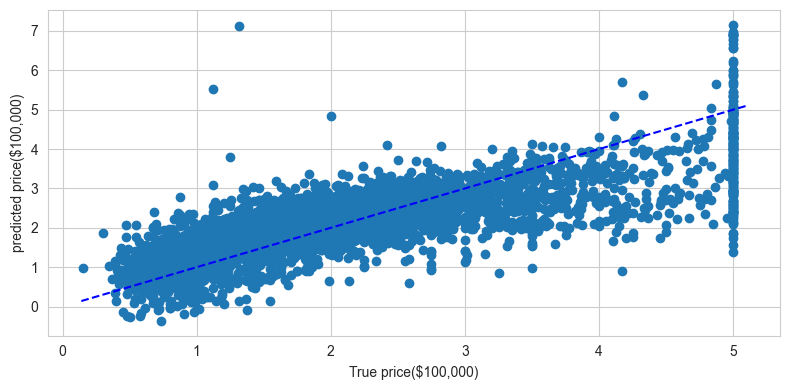

In [104]:
predicted = grid_search.predict(X_test)
expected = y_test
plot_housing_prices(expected, predicted)

# Lasso Regression

In [346]:
from sklearn.linear_model import Lasso

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {"alpha": alphas}
model = Lasso()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# 최적 마라미터와 최고 정확도를 출력.
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

print(f"Training Data evaluation : {grid_search.score(X_train, y_train)}")
print(f"test Data evalution : {grid_search.score(X_test, y_test)}")

Best Hyperparameters: {'alpha': 0.001}
Best Accuracy: 0.602705417484613
Training Data evaluation : 0.6052610039961037
test Data evalution : 0.6094199533700924


# Elastic Regression

In [347]:
from sklearn.linear_model import ElasticNet

alphas = [0.005, 0.05, 0.001, 0.01, 0.1, 1, 10, 100]
l1_ratio = [0.005, 0.05, 0.001, 0.01, 0.1, 1]
param_grid = {"alpha": alphas, "l1_ratio": l1_ratio}
model = ElasticNet()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# 최적 마라미터와 최고 정확도를 출력.
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

print(f"Training Data evaluation : {grid_search.score(X_train, y_train)}")
print(f"test Data evalution : {grid_search.score(X_test, y_test)}")

Best Hyperparameters: {'alpha': 0.005, 'l1_ratio': 0.001}
Best Accuracy: 0.6029395171453507
Training Data evaluation : 0.6051027612095032
test Data evalution : 0.6090703939871321
